In [1]:
## Import required libraries
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import io
import cv2
import random
from skimage import io 
from skimage import data, color
from skimage.transform import rotate, rescale, resize
from skimage.util import random_noise

path = 'C:/Users/user/Jupyter/image-processing/COVID-19_Radiography_Database'

for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

C:\Users\user\anaconda3\envs\imgvenv2\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\envs\imgvenv2\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\envs\imgvenv2\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\envs\imgvenv2\lib\site

C:/Users/user/Jupyter/image-processing/COVID-19_Radiography_Database\COVID-19.metadata.xlsx
C:/Users/user/Jupyter/image-processing/COVID-19_Radiography_Database\NORMAL.metadata.xlsx
C:/Users/user/Jupyter/image-processing/COVID-19_Radiography_Database\README.md.txt
C:/Users/user/Jupyter/image-processing/COVID-19_Radiography_Database\Viral Pneumonia.matadata.xlsx
C:/Users/user/Jupyter/image-processing/COVID-19_Radiography_Database\COVID-19\COVID-19 (1).png
C:/Users/user/Jupyter/image-processing/COVID-19_Radiography_Database\COVID-19\COVID-19 (10).png
C:/Users/user/Jupyter/image-processing/COVID-19_Radiography_Database\COVID-19\COVID-19 (100).png
C:/Users/user/Jupyter/image-processing/COVID-19_Radiography_Database\COVID-19\COVID-19 (101).png
C:/Users/user/Jupyter/image-processing/COVID-19_Radiography_Database\COVID-19\COVID-19 (102).png
C:/Users/user/Jupyter/image-processing/COVID-19_Radiography_Database\COVID-19\COVID-19 (103).png
C:/Users/user/Jupyter/image-processing/COVID-19_Radiograp

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2252166275277698418
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4965466112
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9907442817351170106
physical_device_desc: "device: 0, name: GeForce RTX 2060, pci bus id: 0000:07:00.0, compute capability: 7.5"
]


In [2]:
imagePaths = []
imageCovidPaths = []
imageNormalPaths = []
imagePneumoniaPaths = []
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            imagePaths.append(os.path.join(dirname, filename))
            if 'COVID' in filename:
                imageCovidPaths.append(os.path.join(dirname, filename))
            if 'NORMAL' in filename:
                imageNormalPaths.append(os.path.join(dirname, filename))
            if 'Pneumonia' in filename:
                imagePneumoniaPaths.append(os.path.join(dirname, filename))

image = cv2.imread(imagePaths[0])
print(image.shape)

(1024, 1024, 3)


In [3]:
print(tf.__version__)
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
labels = ["COVID-19", "NORMAL", "Viral Pneumonia"]

2.0.0


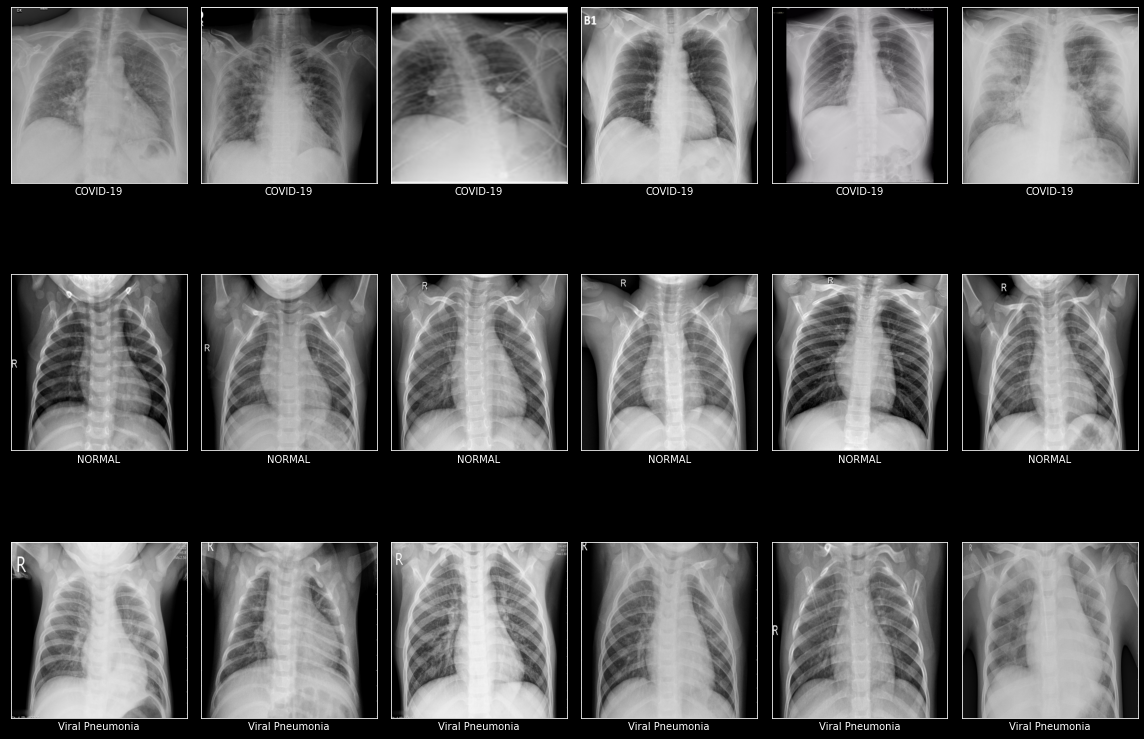

In [4]:
## Visualizing Different Classes
plt.style.use("dark_background")
# Randomly select 5 images in each category
fig, axs = plt.subplots(len(labels), 6, figsize = (16, 12))

class_len = {}
for i, c in enumerate(labels):
    class_path = os.path.join(path, c)
    all_images = os.listdir(class_path)
    sample_images = random.sample(all_images, 6)
    class_len[c] = len(all_images)
    
    for j, image in enumerate(sample_images):
        img_path = os.path.join(class_path, image)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        axs[i, j].imshow(img)
        axs[i, j].set(xlabel = c, xticks = [], yticks = [])
        

fig.tight_layout()

In [101]:
image = cv2.imread(imageCovidPaths[40]) # 8 12 19 20

Original
AxesImage(54,36;334.8x217.44)


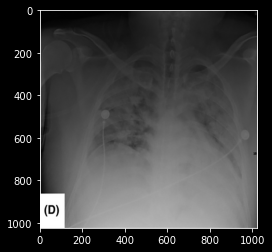

In [102]:
def image_original(image):
    print("Original")
    print(plt.imshow(image))
    return image
processed_img = image_original(image)    

Horizontal Flip
AxesImage(54,36;334.8x217.44)


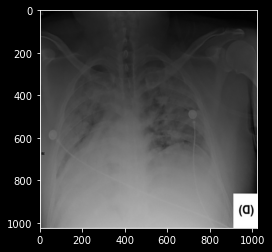

In [103]:
def image_flip_horz(image):
    # flipping image
    processed_img = np.fliplr(image)
    print("Horizontal Flip")
    print(plt.imshow(processed_img))
    return processed_img
processed_img = image_flip_horz(image)   

Left Rotation 25 Degree
AxesImage(54,36;334.8x217.44)


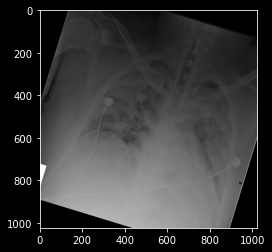

In [104]:
def slight_rotate_left(image):
    # rotating image clockwise
    angle = random.randint(0,25)
    processed_img = rotate(image, -angle)
    print("Left Rotation 25 Degree")
    print(plt.imshow(processed_img))
    return processed_img
processed_img = slight_rotate_left(image)   

Right Rotation 25 Degree
AxesImage(54,36;334.8x217.44)


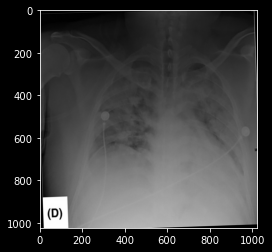

In [105]:
def slight_rotate_right(image):
    # rotating image clockwise
    angle = random.randint(0,25)
    processed_img = rotate(image, angle)
    print("Right Rotation 25 Degree")
    print(plt.imshow(processed_img))
    return processed_img
processed_img = slight_rotate_right(image)   

Rescaled with Aliasing
AxesImage(54,36;334.8x217.44)


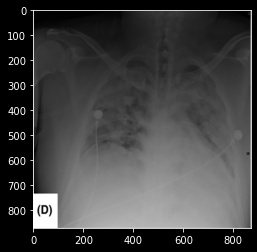

In [106]:
def rescale_alias(image):  
    # https://scikit-image.org/docs/stable/auto_examples/transform/plot_rescale.html
    processed_img = rescale(image, 0.85, anti_aliasing=False)
    print("Rescaled with Aliasing")
    print(plt.imshow(processed_img))
    return processed_img
processed_img = rescale_alias(image)   

Resize with Aliasing
AxesImage(54,36;334.8x217.44)


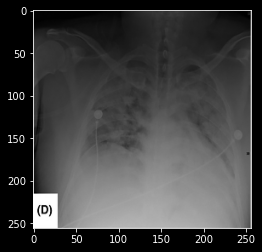

In [107]:
def resize_alias(image):  
    # https://scikit-image.org/docs/stable/auto_examples/transform/plot_rescale.html
    processed_img = resize(image, (image.shape[0] // 4, image.shape[1] // 4),
                       anti_aliasing=False)
    print("Resize with Aliasing")
    print(plt.imshow(processed_img))
    return processed_img
processed_img = resize_alias(image)   

Grayscaling
AxesImage(54,36;334.8x217.44)


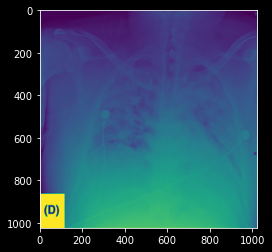

In [108]:
def to_grayscale(image):  
    processed_img = color.rgb2gray(image)
    print("Grayscaling")
    print(plt.imshow(processed_img))
    return processed_img
processed_img = to_grayscale(image)   